<a href="https://colab.research.google.com/github/fzehrauslu/MakineOgrenmesi/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kaynak : https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape


(1797, 64)

In [2]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

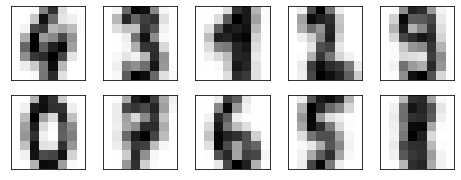

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

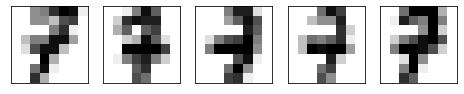

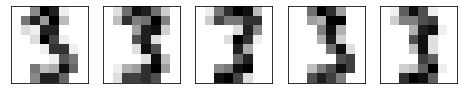

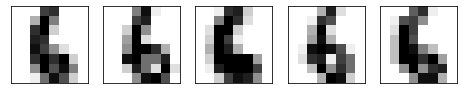

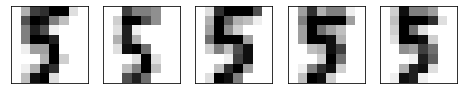

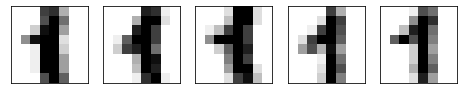

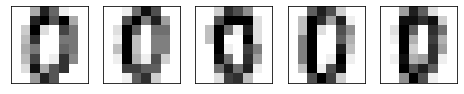

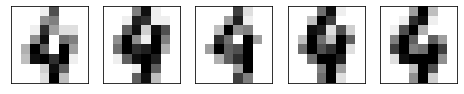

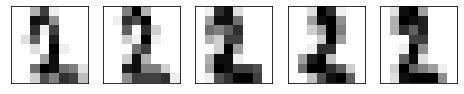

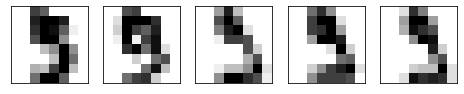

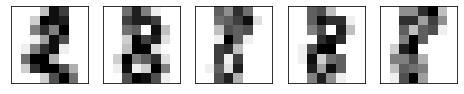

In [19]:
for i in range (10):
  indices = np.nonzero(clusters==i)[0][:5]
  images=np.reshape(digits.data[indices,:],(5,8,8))
  fig, ax = plt.subplots(1, 5, figsize=(8, 3))
  for k in range(5):
    axi=ax[k]
    axi.set(xticks=[], yticks=[])
    axi.imshow(images[k], interpolation='nearest', cmap=plt.cm.binary)



In [0]:
from scipy.stats import mode
import numpy as np
#import pdb
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    #pdb.set_trace()
    labels[mask] = mode(digits.target[mask])[0]

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7952142459654981

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


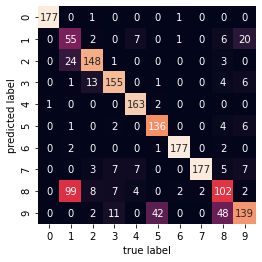

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [9]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9371174179187535